In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from vrae.vrae import VRAE
from vrae.utils import *
import numpy as np
import torch

import plotly
from torch.utils.data import DataLoader, TensorDataset
plotly.offline.init_notebook_mode()

c:\Users\hachou\Anaconda3\envs\cse599n\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import matplotlib.pyplot as plt # plotting library
import numpy as np # this module is useful to work with numerical arrays
import pandas as pd 
import random 
# import tensorflow as tf
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
import numpy as np
import time 
from matplotlib import pyplot as plt
import random
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
import numpy as np
from scipy.signal import butter,filtfilt
# from pupillab_file_methods import load_pldata_file

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# render animation
mpl.rc('animation',html='html5')
# animation
from matplotlib import animation as ani
# Matlab-style plotting
import matplotlib.pyplot as plt

# prep data

## train data

In [ ]:
## 10 trials, each 3 mins (6000 timestamps)
# divide each trial into 20 epoches (300 timestamp each) (~9 sec each epoch)
# 16 epoches (80%) are the train data and 4 epoches are the test data

In [23]:
# 6 subjects, 2 trials each

# self._save_to_hdf_table(timestamp  = current_time, 
#                         data = emg_signals, 
#                         aux_data = aux_channels,
#                         sample_num = sample_num)

packet_freq = 32
time_size = 6000 #maximum timestamp

train_data = []
test_data = []
train_label = []
test_label = []

#subject 1
FILE_LOAD_FOLDER = "C:\\Users\\hachou\\OneDrive - UW\\meta\\eye_tracking\\pilot_022323\\pilot_Liya_022323_ref_dis\\"
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07.h5', 'r') # block 1
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(0) #subject 0
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(0) #subject 0

Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-0716427.h5', 'r') # block 2
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(0) #subject 0
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(0) #subject 0

#subject 2
FILE_LOAD_FOLDER = "C:\\Users\\hachou\\OneDrive - UW\\meta\\eye_tracking\\pilot_022423\\pilot_Sasha_022324_ref_dis\\"
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S1_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07.h5', 'r')
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(1) 
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(1)

Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S1_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07154455.h5', 'r')
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(1) 
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(1)

#subject 3
FILE_LOAD_FOLDER = "C:\\Users\\hachou\\OneDrive - UW\\meta\\eye_tracking\\pilot_022723\\pilot_Jason_022723_ref_dis\\"
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S1_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07.h5', 'r')
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(2) 
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(2)

Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S1_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07174147.h5', 'r')
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(2) 
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(2)

#subject 4
FILE_LOAD_FOLDER = "C:\\Users\\hachou\\OneDrive - UW\\meta\\eye_tracking\\pilot_030723\\pilot_Jason_ref_dis\\"
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07.h5', 'r')
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(3) 
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(3)

Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07173225.h5', 'r')
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(3) 
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(3)

#subject 5
FILE_LOAD_FOLDER = "C:\\Users\\hachou\\OneDrive - UW\\meta\\eye_tracking\\pilot_030923\\pilot_Maneeshika_030923_ref_dis\\"
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07.h5', 'r')
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(4) 
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(4)

Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-0713171.h5', 'r')
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(4) 
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(4)

#subject 6
FILE_LOAD_FOLDER = "C:\\Users\\hachou\\OneDrive - UW\\meta\\eye_tracking\\pilot_Liya_030923\\pilot_Liya_030923_ref_dis\\"
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07.h5', 'r')
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(5) 
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(5)

Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07141221.h5', 'r')
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(5) 
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(5)

#subject 7
Task_Data = h5py.File('test_dataset\\quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07162543.h5', 'r')
f = Task_Data['quattro']['data'][:,:,0]
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(6) 
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(6)

Task_Data = h5py.File('test_dataset\\quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07162118.h5', 'r')
for ep in range(16): # 16 epoches (0~15)
    train_data.append( f[300*ep:300*(ep+1),:] )
    train_label.append(6) 
for ep in [16,17,18,19]: # 4 epoches (16~19)
    test_data.append( f[300*ep:300*(ep+1),:] )
    test_label.append(6)

In [25]:
train_data = np.squeeze(np.asarray(train_data))
print(train_data.shape) # datasize(16epochx14trials) x timestamp x channels

train_label = np.squeeze(np.asarray(train_label))
print(train_label.shape) # datasize

test_data = np.squeeze(np.asarray(test_data))
print(test_data.shape)  # datasize(4epochx14trials) x timestamp x channels

test_label = np.squeeze(np.asarray(test_label))
print(test_label.shape) 

(224, 300, 64)
(224,)
(56, 300, 64)
(56,)


In [27]:
#  make tensor
TRAIN_DATA = torch.from_numpy(train_data)
print(TRAIN_DATA.size()) 

TRAIN_LABEL = train_label[:,np.newaxis]
print(TRAIN_LABEL.shape) 

TEST_DATA = torch.from_numpy(test_data)
print(TEST_DATA.size()) 

TEST_LABEL = test_label[:,np.newaxis]
print(TEST_LABEL.shape) 

torch.Size([224, 300, 64])
(224, 1)
torch.Size([56, 300, 64])
(56, 1)


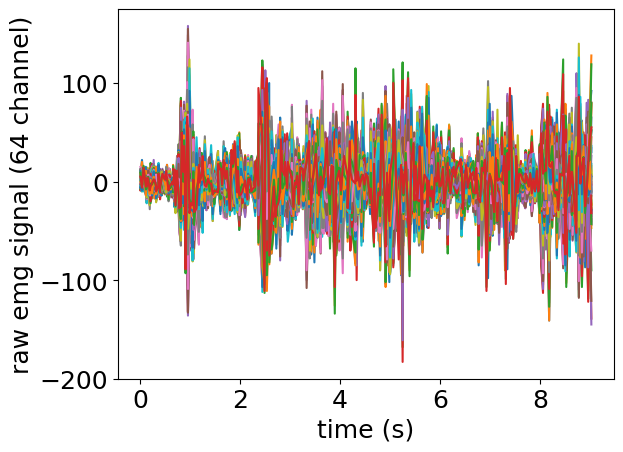

In [28]:
T = 300
t = (Task_Data['quattro']['timestamp'][:T] - Task_Data['quattro']['timestamp'][:T][0]).flatten()
# for ch in range(64):
plt.plot(t,TRAIN_DATA[0,:,:]) #first epoch of first trial
plt.xlabel('time (s)')
plt.ylabel('raw emg signal (64 channel)')
plt.show()

## EMG rectification

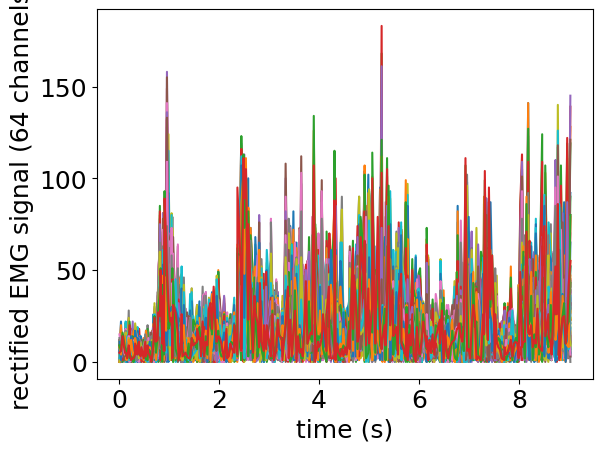

In [31]:
# full wave rectification
train_data_rec = torch.absolute(TRAIN_DATA)
test_data_rec = torch.absolute(TEST_DATA)

plt.plot(t,train_data_rec[0,:,:])
plt.xlabel('time (s)')
plt.ylabel('rectified EMG signal (64 channels)')
plt.show()

# VAE

In [32]:
# make tensor dataset
train_dataset = TensorDataset(train_data_rec)
test_dataset = TensorDataset(test_data_rec)

In [33]:
# **Fetch `sequence_length` from dataset**
sequence_length = train_data_rec.shape[1]
sequence_length

300

In [34]:
#**Fetch `number_of_features` from dataset** 
number_of_features = train_data_rec.shape[2]
number_of_features

64

## hyperparameters

In [81]:
# hyperparameters
hidden_size = 5
hidden_layer_depth = 2
latent_length = 5
batch_size = 5
learning_rate = 0.0005 #1e-4
n_epochs =  40
dropout_rate = 0.2
optimizer = 'SGD' # options: ADAM, SGD
cuda = True # options: True, False
print_every=30
clip = True # options: True, False
max_grad_norm=5
loss = 'MSELoss' # options: SmoothL1Loss, MSELoss
block = 'LSTM' # options: LSTM, GRU
dload = './model_dir' #download directory

In [82]:
#initialization
vrae = VRAE(sequence_length=sequence_length,
            number_of_features = number_of_features,
            hidden_size = hidden_size, 
            hidden_layer_depth = hidden_layer_depth,
            latent_length = latent_length,
            batch_size = batch_size,
            learning_rate = learning_rate,
            n_epochs = n_epochs,
            dropout_rate = dropout_rate,
            optimizer = optimizer, 
            cuda = cuda,
            print_every=print_every, 
            clip=clip, 
            max_grad_norm=max_grad_norm,
            loss = loss,
            block = block)
            # dload = dload)

c:\Users\hachou\Anaconda3\envs\cse599n\lib\site-packages\torch\nn\_reduction.py:42: UserWarning:

size_average and reduce args will be deprecated, please use reduction='sum' instead.



## fit the model

In [83]:
vrae.fit(train_dataset)


Epoch: 0
Batch 30, loss = 1375184896.0000, recon_loss = 1375184896.0000, kl_loss = 0.0752
Average loss: 802839723.1628
Epoch: 1
Batch 30, loss = 878901120.0000, recon_loss = 878901120.0000, kl_loss = 0.0816
Average loss: 807677165.7674
Epoch: 2
Batch 30, loss = 659040000.0000, recon_loss = 659040000.0000, kl_loss = 0.0810
Average loss: 793714458.0465
Epoch: 3
Batch 30, loss = 643265024.0000, recon_loss = 643265024.0000, kl_loss = 0.0752
Average loss: 806897248.3721
Epoch: 4
Batch 30, loss = 540746624.0000, recon_loss = 540746624.0000, kl_loss = 0.0719
Average loss: 798505236.8372
Epoch: 5
Batch 30, loss = 1443789312.0000, recon_loss = 1443789312.0000, kl_loss = 0.0833
Average loss: 804207196.2791
Epoch: 6
Batch 30, loss = 734390144.0000, recon_loss = 734390144.0000, kl_loss = 0.0801
Average loss: 789334935.0698
Epoch: 7
Batch 30, loss = 424305568.0000, recon_loss = 424305568.0000, kl_loss = 0.0835
Average loss: 788922872.5581
Epoch: 8
Batch 30, loss = 254521776.0000, recon_loss = 25452

In [38]:
vrae.save('vrae_new.pth')



In [210]:
# To load a presaved model, execute:
vrae.load('vrae.pth')
# vrae2.load('vrae2.pth')

## reconstruct the data

In [84]:
EMG_reconstruct = vrae.reconstruct(test_dataset)
EMG_reconstruct.shape #time x size x channels

(300, 55, 64)

In [85]:
EMG_reconstruct_train = vrae.reconstruct(train_dataset)
EMG_reconstruct_train.shape #time x size x 1

(300, 220, 64)

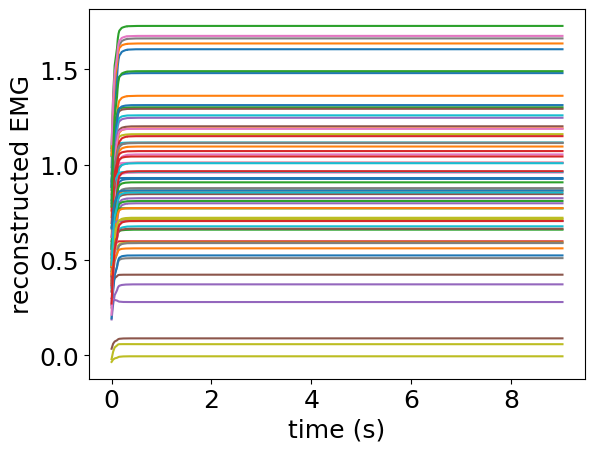

In [86]:
plt.plot(t,EMG_reconstruct[:,0,:])
plt.xlabel('time (s)')
plt.ylabel('reconstructed EMG')
plt.show()

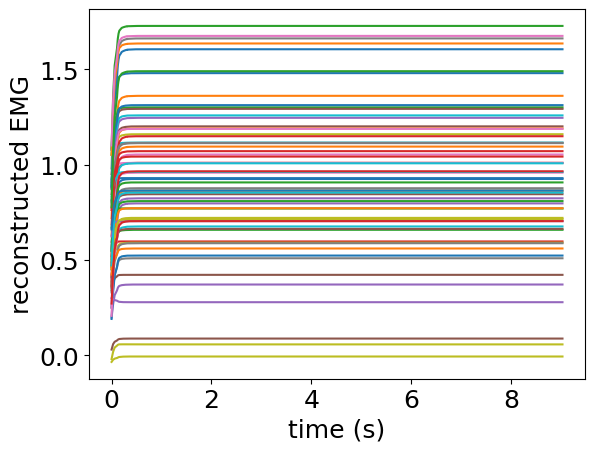

In [87]:
plt.plot(t,EMG_reconstruct_train[:,0,:])
plt.xlabel('time (s)')
plt.ylabel('reconstructed EMG')
plt.show()

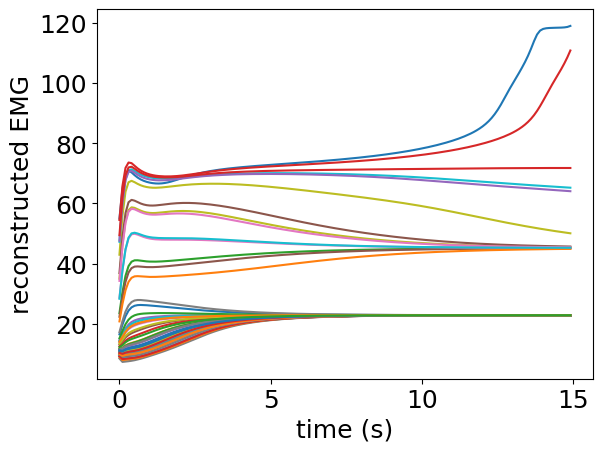

<Figure size 640x480 with 0 Axes>

In [230]:
# # for i in range(256):
# #     plt.plot(EMG_reconstruct[:,i])
# # # plt.plot(EMG_reconstruct[:,1])
# # # plt.plot(EMG_reconstruct[:,2])
# # plt.show()
# t = np.arange(0,150,1) / 10
# for ch in range(64):
#     plt.plot(t,EMG_reconstruct[:,4*ch])
#     # plt.plot(t,EMG_reconstruct[:,64*1 -1])
#     # plt.plot(t,EMG_reconstruct[:,64*2 -1])
# plt.xlabel('time (s)')
# plt.ylabel('reconstructed EMG')
# plt.show()

# plt.savefig('reconstruct emg.png')

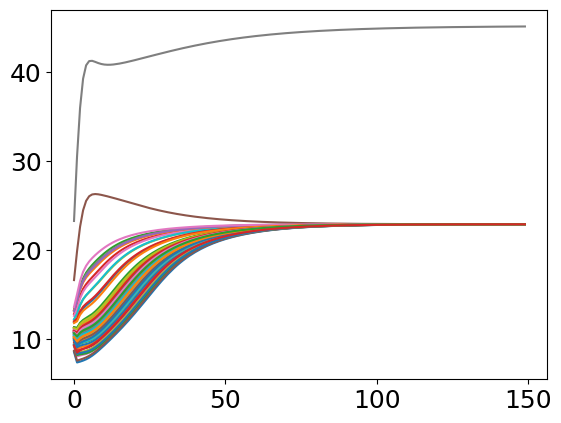

In [217]:
for ch in range(64):
    plt.plot(EMG_reconstruct_train[:,4*ch])
    # plt.plot(t,EMG_reconstruct[:,64*1 -1])
    # plt.plot(t,EMG_reconstruct[:,64*2 -1])
plt.show()

## transform to latend variables

In [56]:
test_dataset.size

AttributeError: 'TensorDataset' object has no attribute 'size'

In [77]:
# z_run = vrae.transform(train_dataset) 
z_run = vrae.transform(test_dataset) 
z_run.shape # dataset x latend variables


(55, 20)

In [78]:
z_run_train = vrae.transform(train_dataset) 
z_run_train.shape # dataset x latend variables

(220, 20)

In [90]:
EMG_reconstruct_train = vrae.reconstruct(z_run_train)
EMG_reconstruct_train.shape #time x size x 1

RuntimeError: number of dims don't match in permute

## Visualize PCA Dimensions of latend variables

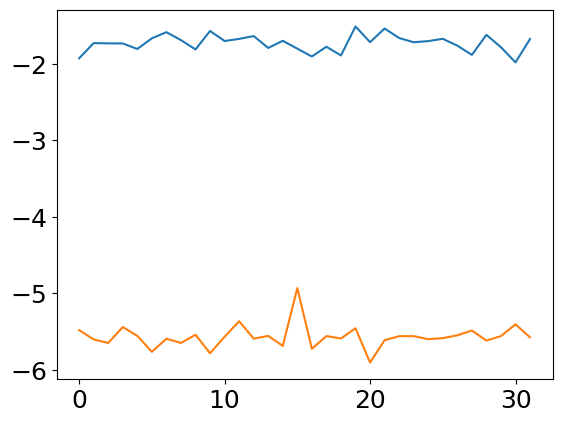

In [50]:
plt.plot(z_run[:,0])
plt.plot(z_run[:,1])

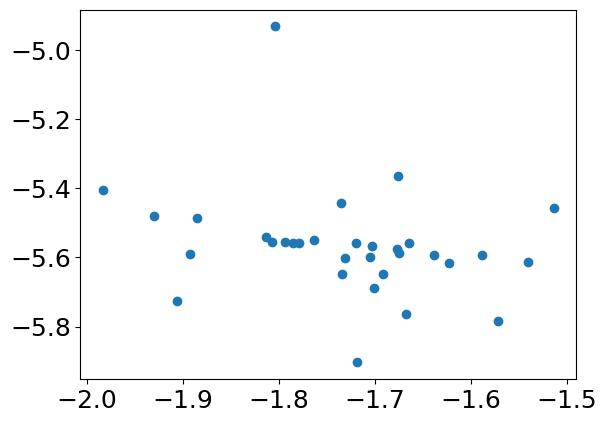

In [51]:
plt.scatter(z_run[:,0],z_run[:,1])
plt.show()

## 2 PCA

In [168]:
U,S,Vh = torch.svd(torch.from_numpy(z_run.reshape(-1,5)))
# U,S,Vh = torch.svd( torch.from_numpy(z_run) )
mapping= Vh.T[:2].T #extract the mapping to the first 2 PCs
PCs = torch.from_numpy(z_run)@mapping
PCs.size()

torch.Size([256, 2])

In [176]:
c = 0
PCs[64*c:64*(c+1)].shape

torch.Size([64, 2])

In [169]:
avg_pc = [] 
std_pc = []
for c in range(5): #for each feature (channel), every 64 trials
    avg_pc.append( torch.mean(PCs[64*c:64*(c+1)],axis =0) ) #mean of PCA across all trials for a condition 
    std_pc.append( torch.std(PCs[64*c:64*(c+1)],axis =0) ) #std of PCA across all trials for a condition 

IndexError: too many indices for tensor of dimension 1

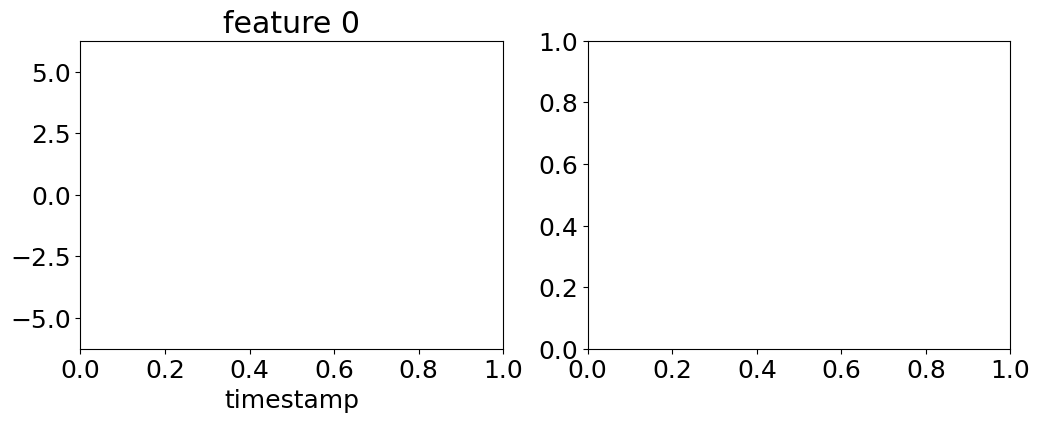

In [170]:
fig,axs = plt.subplots(1,2,figsize = (12,4))
x_axis = np.arange(0,25,1)

for u in range(2): # for each feature (each PC)
    axs[u].set_title('feature ' + str(u))
    axs[u].set_xlabel('timestamp')
    axs[u].set_ylim(-6.25,6.25)
    for c in range(5): # each condition
        ax = axs[u]
        avg = avg_pc[c][:,u].detach().numpy()
        std = std_pc[c][:,u].detach().numpy()
        # var = (std_hidden[c][:,units[u]].detach().numpy())**2
        ax.plot(x_axis,avg, label = 'condition '+str(c)) #plot mean across trials
        ax.fill_between(x_axis,avg-std, avg+std,alpha = 0.3) #fill between variance

axs[0].set_ylabel('mean hidden states +- stdev')
axs[1].legend(bbox_to_anchor = (1,1),frameon = False)
# axs[1,2].legend(bbox_to_anchor = (1,1),frameon = False)
# axs[0,1].set_title('')
fig.suptitle('average PCA across trials for each condition')

plt.tight_layout()
plt.show()

In [171]:
for c in range(5): #each condition
    PC0 = avg_pc[c][:,0].detach().numpy()
    PC1 = avg_pc[c][:,1].detach().numpy()
    plt.plot(PC0,PC1,'.',label = 'condition '+str(c))
    plt.plot(PC0[0],PC1[0],'ro') #first timestamp of each condition
plt.plot([],[],'ro',label='first time stamp')
plt.title('condition-averaged PCA')
plt.xlabel('first PCA')
plt.ylabel('second PCA')
plt.legend()
plt.tight_layout()
plt.show()

IndexError: too many indices for tensor of dimension 1

## PCA and tSNE plots

In [73]:
def plot_clustering_matplotlib(z_run, labels):

    labels = labels[:z_run.shape[0]] # because of weird batch_size

    hex_colors = []
    for _ in np.unique(labels):
        hex_colors.append('#%06X' % randint(0, 0xFFFFFF))

    colors = [hex_colors[int(i)] for i in labels]

    z_run_pca = TruncatedSVD(n_components=3).fit_transform(z_run)
    z_run_tsne = TSNE(perplexity=80, min_grad_norm=1E-12, n_iter=3000).fit_transform(z_run)

    plt.scatter(z_run_pca[:, 0], z_run_pca[:, 1], c=colors, marker='*', linewidths=0)
    print(z_run_pca[:, 0].shape)
    # plt.title('first 2 PCA on latend variables')
    plt.xlabel('first PCA')
    plt.ylabel('second PCA')
    # plt.legend()

    # plt.scatter(z_run_tsne[:, 0], z_run_tsne[:, 1], c=colors, marker='*', linewidths=0)
    # plt.title('tSNE on z_run')
    # if download:
    #     if os.path.exists(folder_name):
    #         pass
    #     else:
    #         os.mkdir(folder_name)
    #     plt.savefig(folder_name + "/tsne.png")
    # else:
    #     plt.show()
    

In [79]:
plot_clustering_matplotlib(z_run, TEST_LABEL[:-2])
plt.show()
# plt.savefig('PCA.png')

ValueError: perplexity must be less than n_samples

(220,)


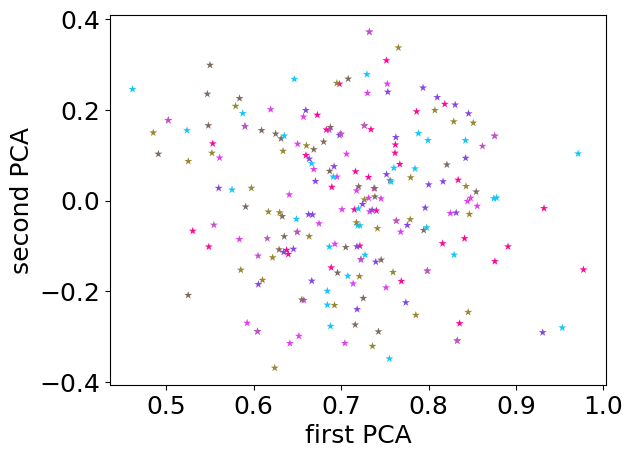

In [89]:
plot_clustering_matplotlib(z_run_train, TRAIN_LABEL)
plt.show()
# plt.savefig('PCA.png')

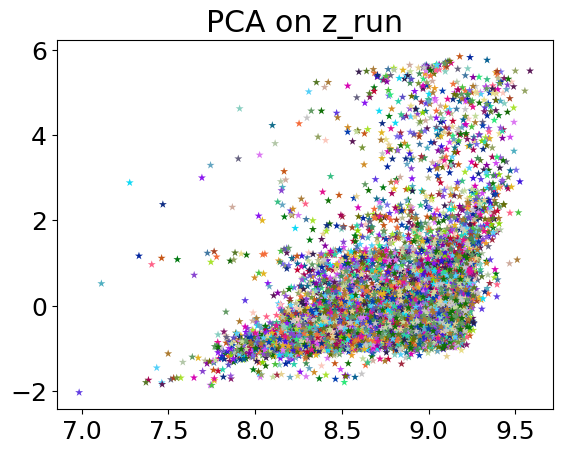

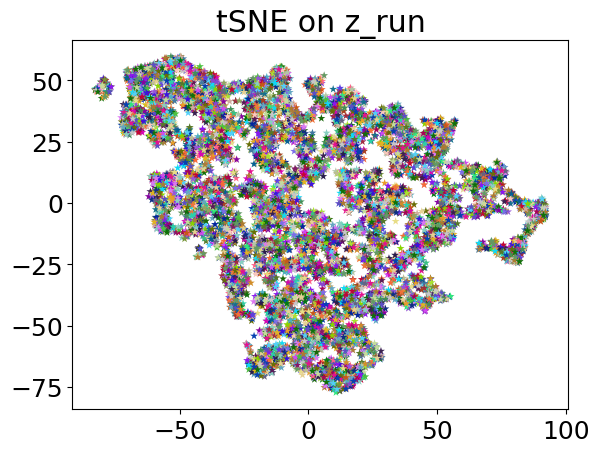

In [59]:
# plot_clustering(z_run, train_label, engine='matplotlib', download = False)
plot_clustering(z_run, TEST_LABEL, engine='matplotlib', download = False)

In [63]:
z_run_train.shape

(25600, 20)

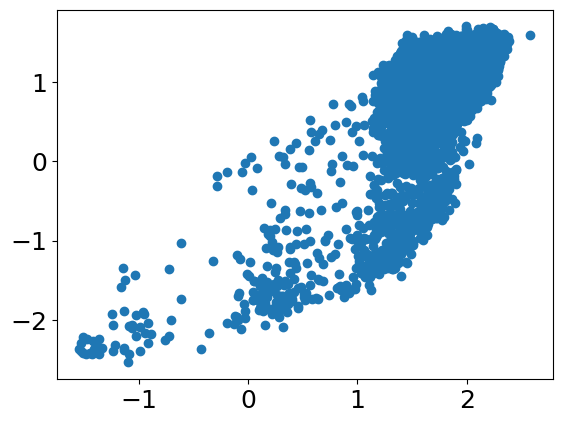

In [61]:
plt.scatter(z_run_train[:,0],z_run_train[:,1])
plt.show()

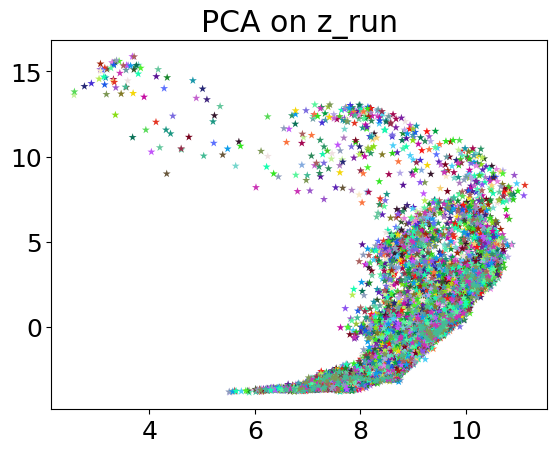

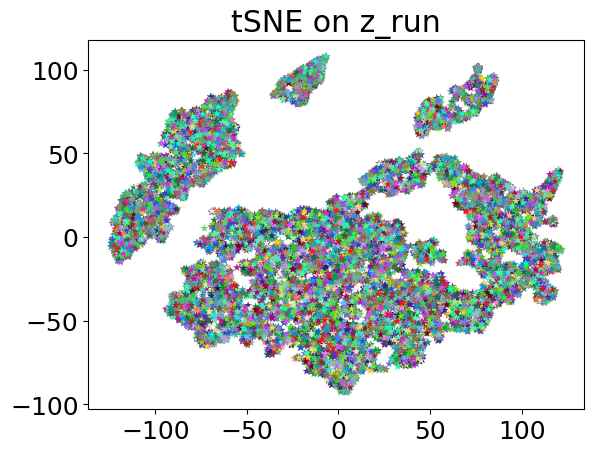

In [62]:
plot_clustering(z_run_train, TRAIN_LABEL, engine='matplotlib', download = False)

# Stand EMG pre-processing 


## EMG data filtering

In [235]:
train_data_rec.size()

torch.Size([640, 6000, 1])

In [236]:
# low-pass filtering
def butter_lowpass_filter(data, cutoff, fs, order,nyq):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter requirements:
T = t[-1]
fs = 32       # sample rate, Hz
cutoff = 2     # desired cutoff frequency of the filter, Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 4      # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

filtered_train_data = np.empty(train_data_rec.size())
filtered_test_data = np.empty(test_data_rec.size())
for idx in range(train_data_rec.size()[0]): # index of trial
    filtered_train_data[idx,:,0] = butter_lowpass_filter(np.squeeze(train_data_rec[idx,:,0]), cutoff, fs, order,nyq)
for idx in range(test_data_rec.size()[0]): # index of trial
    filtered_test_data[idx,:,0] = butter_lowpass_filter(np.squeeze(test_data_rec[idx,:,0]), cutoff, fs, order,nyq)

# filtered_train_data_ = torch.absolute(torch.from_numpy(filtered_train_data))
# filtered_test_data_ = torch.absolute(torch.from_numpy(filtered_test_data))

In [237]:
filtered_test_data.shape

(256, 6000, 1)

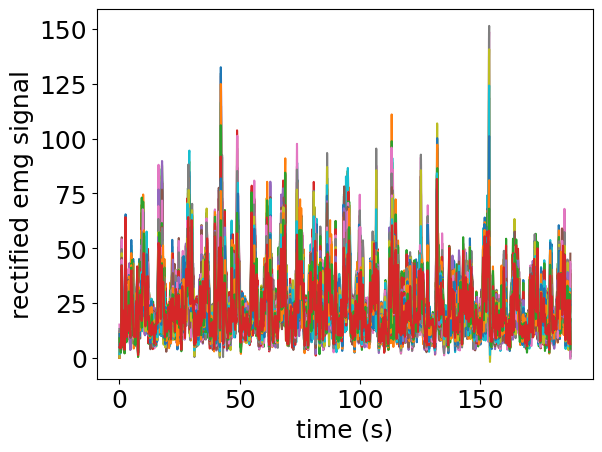

In [238]:
# plt.plot(t,filtered_train_data[64*0 -1,:])
# plt.plot(t,filtered_train_data[64*1 -1,:])
# plt.plot(t,filtered_train_data[64*2 -1,:])

for ch in range(64):
    plt.plot(t,filtered_train_data[ch,:])
# plt.show()

plt.xlabel('time (s)')
plt.ylabel('rectified emg signal')
plt.show()

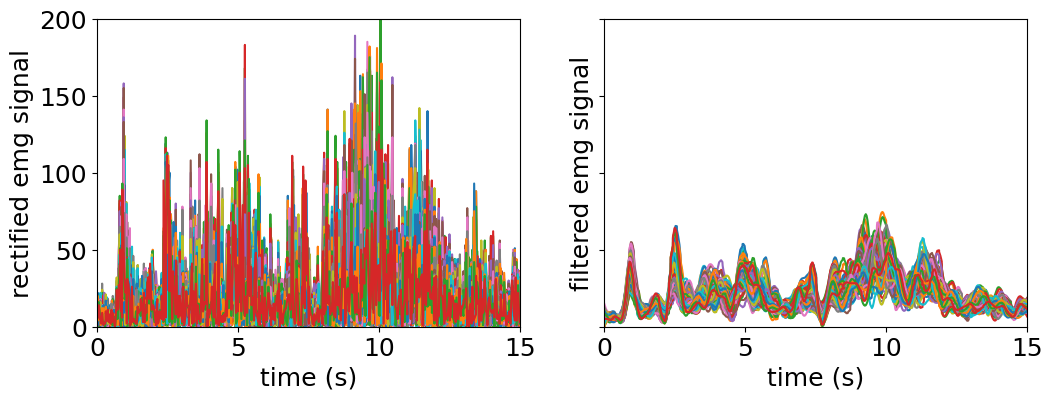

<Figure size 640x480 with 0 Axes>

In [239]:
fig,axs = plt.subplots(1,2, figsize = (12,4), sharex = True, sharey = True)
ax = axs[0]
for ch in range(64):
    ax.plot(t,train_data_rec[ch,:])
ax = axs[1]
for ch in range(64):
    ax.plot(t,filtered_train_data[ch,:])
axs[0].set_xlim(0,15)
axs[0].set_ylim(0,200)

axs[0].set_xlabel('time (s)')
axs[1].set_xlabel('time (s)')
axs[0].set_ylabel('rectified emg signal')
axs[1].set_ylabel('filtered emg signal')
plt.show()
plt.savefig('filtered emg.png')
# plt.xlabel('time')
# plt.ylabel('rectified emg signal, 64 channels')
# plt.show()